# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [ ]:
#This Data is related to 17 campaigns that occured between MAY 2008 and November 2010

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd

In [4]:
df = pd.read_csv(r'C:\Users\ryanb\Downloads\module_17_starter (1)\data\bank-additional-full.csv', sep = ';')

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [ ]:
#job, marital, education, default, housing, loan, and poutcome

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
#The business objective is to develop a predictive model that can accurately determine whether a client will subscribe to a term deposit following a marketing campaign. By analyzing historical data from multiple telemarketing campaigns conducted by a Portuguese bank, the model aims to help the bank improve the effectiveness of future campaigns by identifying the characteristics of clients who are more likely to subscribe to a term deposit. This will enable the bank to optimize its resources, such as reducing the number of contacts made, while maintaining or increasing the success rate of subscriptions, ultimately leading to better campaign targeting and cost efficiency.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Load the dataset
df = pd.read_csv(r'C:\Users\ryanb\Downloads\module_17_starter (1)\data\bank-additional-full.csv', sep=';')

# Select relevant features (bank client data)
bank_client_data = df[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'y']]

# Handle missing values (unknown treated as a category)
# Encoding categorical variables using one-hot encoding
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan']
onehot_encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_columns = onehot_encoder.fit_transform(bank_client_data[categorical_columns])

# Create a DataFrame with the one-hot encoded variables
encoded_df = pd.DataFrame(encoded_columns, columns=onehot_encoder.get_feature_names_out(categorical_columns))

# Drop the original categorical columns and concatenate the encoded columns
bank_client_data = bank_client_data.drop(categorical_columns, axis=1)
bank_client_data = pd.concat([bank_client_data, encoded_df], axis=1)

# Encode the target variable 'y'
label_encoder = LabelEncoder()
bank_client_data['y'] = label_encoder.fit_transform(bank_client_data['y'])


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [13]:

# Split the dataset into features and target variable
X = bank_client_data.drop('y', axis=1)
y = bank_client_data['y']

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output the shapes of the resulting datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape



((32950, 28), (8238, 28), (32950,), (8238,))

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [14]:
# Calculate the class distribution of the target variable 'y'
class_distribution = y.value_counts(normalize=True)

# Identify the majority class
majority_class = class_distribution.idxmax()

# Calculate the baseline accuracy (percentage of the majority class)
baseline_accuracy = class_distribution.max()

print(f"Majority class: {majority_class}")
print(f"Baseline accuracy: {baseline_accuracy:.4f}")


Majority class: 0
Baseline accuracy: 0.8873


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [15]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on the training data
log_reg.fit(X_train, y_train)

# Predict the target for the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Logistic Regression Model Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Logistic Regression Model Accuracy: 0.8865
Confusion Matrix:
[[7303    0]
 [ 935    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      7303
           1       0.00      0.00      0.00       935

    accuracy                           0.89      8238
   macro avg       0.44      0.50      0.47      8238
weighted avg       0.79      0.89      0.83      8238



C:\Users\ryanb\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ryanb\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ryanb\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Problem 9: Score the Model

What is the accuracy of your model?

In [16]:
print(f"Logistic Regression Model Accuracy: {accuracy:.4f}")

Logistic Regression Model Accuracy: 0.8865


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [18]:
import pandas as pd
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42)
}

# Prepare a list to store the results
results_list = []

# Iterate through each model, fit it, and record the results
for model_name, model in models.items():
    # Start timer
    start_time = time.time()
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # End timer
    end_time = time.time()
    
    # Calculate training time
    train_time = end_time - start_time
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Append the results to the list
    results_list.append({
        'Model': model_name,
        'Train Time (s)': round(train_time, 4),
        'Train Accuracy': round(train_accuracy, 4),
        'Test Accuracy': round(test_accuracy, 4)
    })

# Convert the list to a DataFrame
results = pd.DataFrame(results_list)

# Display the results DataFrame
print(results)


                    Model  Train Time (s)  Train Accuracy  Test Accuracy
0     Logistic Regression          0.7439          0.8876         0.8865
1     K-Nearest Neighbors          0.0152          0.8900         0.8742
2           Decision Tree          0.1975          0.9166         0.8610
3  Support Vector Machine         21.3016          0.8876         0.8865


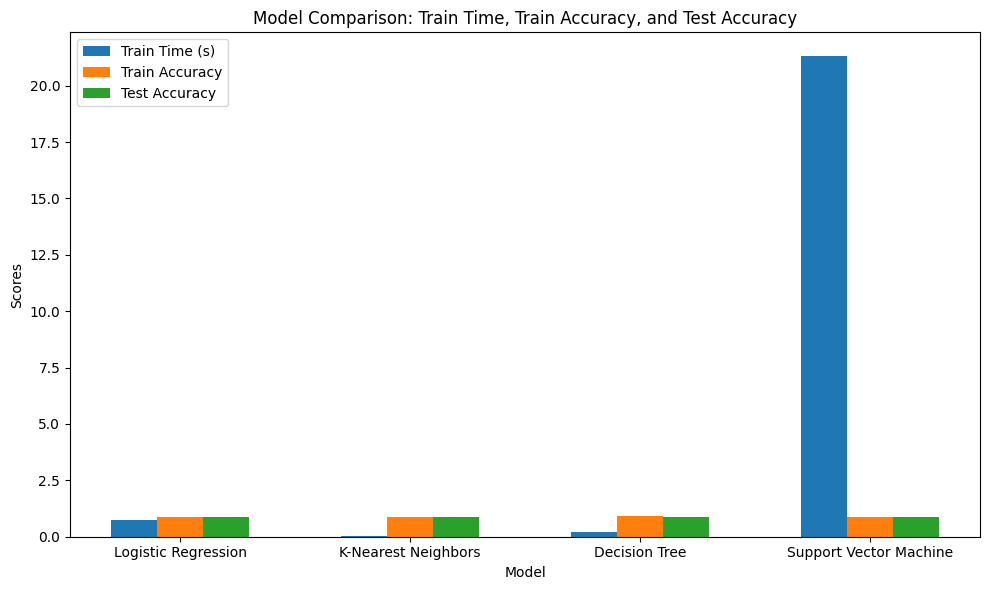

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'results' is the DataFrame with the comparison data

# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))

# Get the index positions for each group
index = np.arange(len(results['Model']))
bar_width = 0.2

# Plot the bars
train_time_bar = ax.bar(index, results['Train Time (s)'], bar_width, label='Train Time (s)')
train_acc_bar = ax.bar(index + bar_width, results['Train Accuracy'], bar_width, label='Train Accuracy')
test_acc_bar = ax.bar(index + 2 * bar_width, results['Test Accuracy'], bar_width, label='Test Accuracy')

# Labeling
ax.set_xlabel('Model')
ax.set_ylabel('Scores')
ax.set_title('Model Comparison: Train Time, Train Accuracy, and Test Accuracy')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(results['Model'])
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [19]:
from sklearn.model_selection import GridSearchCV

# Example: Hyperparameter tuning for KNN
knn = KNeighborsClassifier()
knn_params = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
grid_knn = GridSearchCV(knn, knn_params, cv=5, scoring='accuracy')
grid_knn.fit(X_train, y_train)

print(f"Best KNN parameters: {grid_knn.best_params_}")
print(f"Best KNN accuracy: {grid_knn.best_score_:.4f}")


Best KNN parameters: {'n_neighbors': 9, 'weights': 'uniform'}
Best KNN accuracy: 0.8835


##### Questions